In [230]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

pd.set_option('display.max_columns', None)

from warnings import filterwarnings
filterwarnings('ignore')

import sys
sys.path.append('/Users/patchong/Google Drive/Work/Prep/Challenges/CarbonChain')

In [231]:
df_2018 = pd.read_csv('/Users/patchong/Google Drive/My Drive/Work/Prep/Challenges/CarbonChain/2018.csv')
df_2019 = pd.read_csv('/Users/patchong/Google Drive/My Drive/Work/Prep/Challenges/CarbonChain/2019.csv')
df_2020 = pd.read_csv('/Users/patchong/Google Drive/My Drive/Work/Prep/Challenges/CarbonChain/2020.csv')
df_2021 = pd.read_csv('/Users/patchong/Google Drive/My Drive/Work/Prep/Challenges/CarbonChain/2021.csv')

In [232]:
df = pd.concat([df_2018, df_2019, df_2020, df_2021])

In [233]:
print('Shape: {0}'.format(df.shape))

Shape: (48984, 64)


In [234]:
# df.head(5) 

In [294]:
# df.info(verbose=True)

### Analyzing the emissions data from the MRV system can provide valuable insights into the environmental impact of maritime transportation. Initial insights include:

- LNG carriers becoming more technically efficient than any other ship type (see bottom visual).
  - Future analyses could include identifying the best emission reduction strategies used by LNG carriers, such as newly adopted cleaner fuels, energy-efficient technologies (e.g. advanced engines, fleet renewal), or operational practices (e.g. better routes) that can be implemented for other ship types.
- Other future analyses could include
  - Investigating regulations (see total emissions from France), comparing emissions with existing regulations or standards, and assessing whether ships are meeting emission standards and progressing towards emission reduction targets.
  - Evaluating the environmental impact of ship emissions, such as their contribution to air pollution or the potential effects of climate change. This analysis can help raise awareness about the importance of reducing ship emissions and support policy-making efforts.

### How many ships of each type are there?
- Bulk carriers, container ships, and oil tankers are the three most prevalent ships.
- We don't see a spike or reduction in ship type volumes.

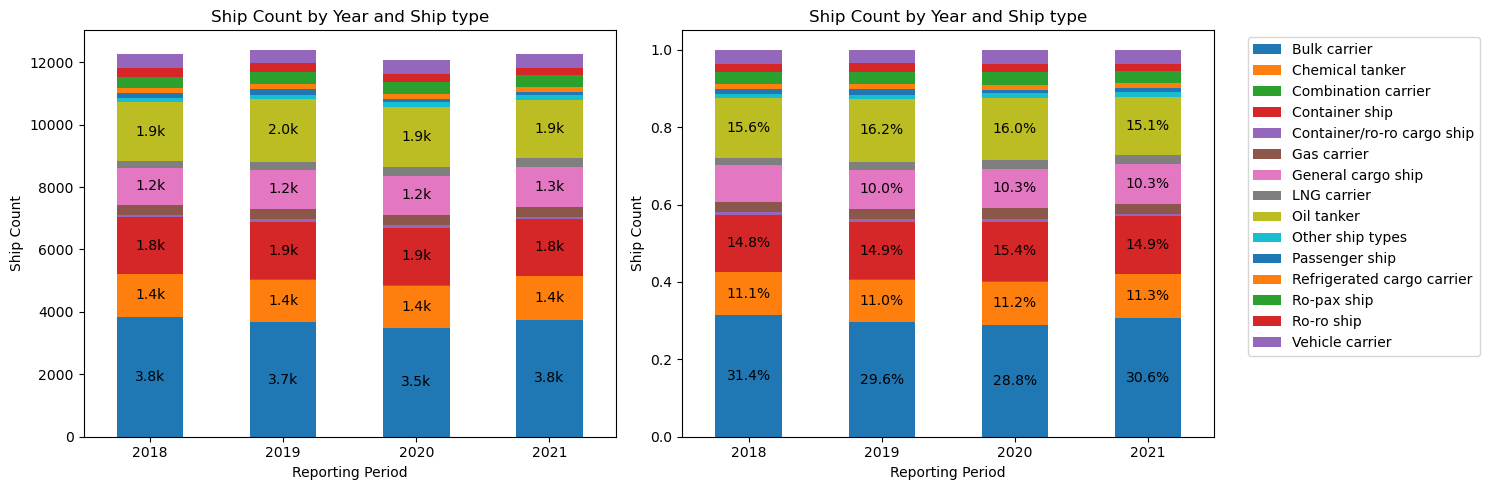

In [236]:
ship_count = df.groupby(['Reporting Period', 'Ship type'])['IMO Number'].count().reset_index().pivot('Reporting Period', 'Ship type', 'IMO Number')

fig, ax = plt.subplots(1,2, figsize = (15,5))

# stacked
ship_count.plot(kind='bar', stacked=True, rot=0, ylabel='Ship Count', ax = ax.ravel()[0], legend=False)
ax.ravel()[0].set_title('Ship Count by Year and Ship type')
# ax.ravel()[0].bar_label(ax.ravel()[0].containers[-1])

for c in ax.ravel()[0].containers:
    labels = [str(round(v.get_height()/1000,1)) + "k" if v.get_height() > 1000 else '' for v in c]
    ax.ravel()[0].bar_label(c, labels=labels, label_type='center')

# stacked 100%
ship_count.transpose().divide(ship_count.sum(axis=1)).transpose().plot(kind='bar', stacked=True, rot=0, ylabel='Ship Count', ax = ax.ravel()[1])
ax.ravel()[1].set_title('Ship Count by Year and Ship type')
                  
for c in ax.ravel()[1].containers:
    labels = [str(round(v.get_height()*100.0,1)) + "%" if v.get_height() > 0.1 else '' for v in c]
    ax.ravel()[1].bar_label(c, labels=labels, label_type='center') 

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
fig.tight_layout()                                  

In [306]:
# ship_count = df.groupby(['Verifier Country', 'Ship type'])['IMO Number'].count().reset_index().pivot('Verifier Country', 'Ship type', 'IMO Number')

# fig, ax = plt.subplots(1,2, figsize = (15,5))

# # stacked
# ship_count.plot(kind='bar', stacked=True, rot=0, ylabel='Ship Count', ax = ax.ravel()[0], legend=False)
# ax.ravel()[0].set_title('Ship Count by Country and Ship type')
# # ax.ravel()[0].bar_label(ax.ravel()[0].containers[-1])

# for c in ax.ravel()[0].containers:
#     labels = [str(round(v.get_height()/1000,1)) + "k" if v.get_height() > 1000 else '' for v in c]
#     ax.ravel()[0].bar_label(c, labels=labels, label_type='center')

# # stacked 100%
# ship_count.transpose().divide(ship_count.sum(axis=1)).transpose().plot(kind='bar', stacked=True, rot=0, ylabel='Ship Count', ax = ax.ravel()[1])
# ax.ravel()[1].set_title('Ship Count by Country and Ship type')
                  
# for c in ax.ravel()[1].containers:
#     labels = [str(round(v.get_height()*100.0,1)) + "%" if v.get_height() > 0.1 else '' for v in c]
#     ax.ravel()[1].bar_label(c, labels=labels, label_type='center') 

# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# fig.tight_layout()                                  

### How do the emissions profiles differ for the different ship types?
- Emission Trends
  - No large fluctuations YoY. There is a ~15% drop in emissions in 2020 and 2021, likely due to the UK leaving the EU (see total emissions by country).
- Sector Analysis
  - Although container ships are not the most prevalent ship, they make up for a third of total emissions, indicating the ships aren't fuel-efficient, they're travelling more nautical miles causing more emissions or both, etc. Let's investigate below

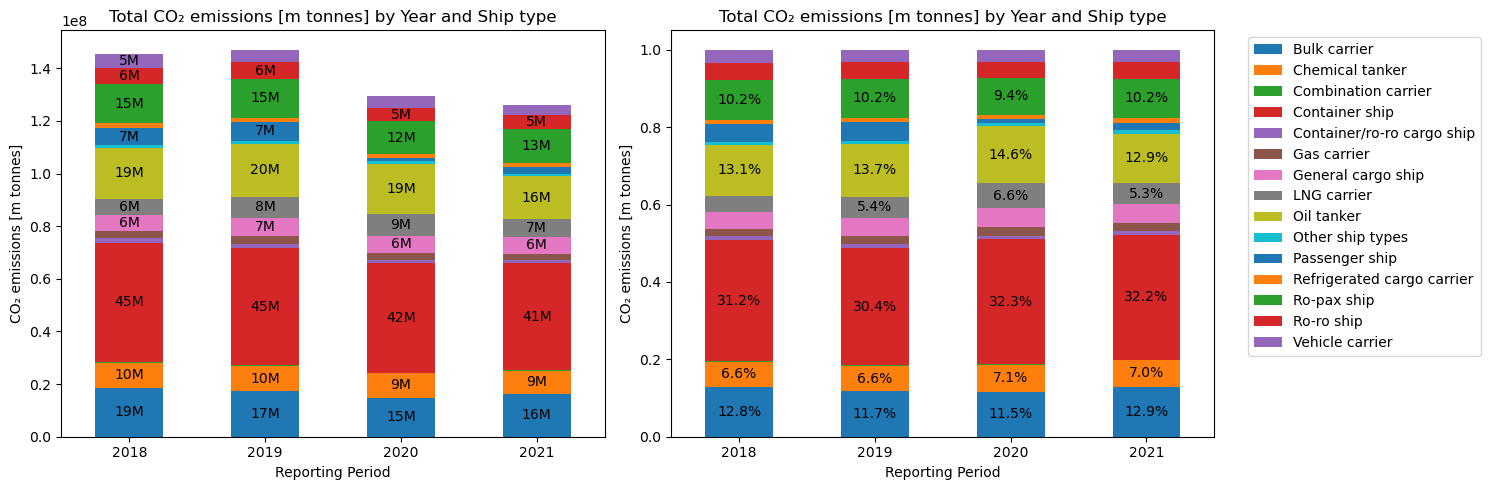

In [286]:
tot_c02 = df.groupby(['Reporting Period', 'Ship type'])['Total CO₂ emissions [m tonnes]'].sum().reset_index().pivot('Reporting Period', 'Ship type', 'Total CO₂ emissions [m tonnes]')

fig, ax = plt.subplots(1,2, figsize = (15,5))

# stacked
tot_c02.plot(kind='bar', stacked=True, rot=0, ylabel='CO₂ emissions [m tonnes]', ax = ax.ravel()[0], legend=False)
ax.ravel()[0].set_title('Total CO₂ emissions [m tonnes] by Year and Ship type')
# ax.ravel()[0].set(yticks=([0, 50000000, 100000000, 150000000]))
# ax.ravel()[0].set(ylabels=(['0', '50M', '100M', '150M']))
# ax.ravel()[0].bar_label(ax.ravel()[0].containers[-1])

for c in ax.ravel()[0].containers:
    labels = [str(round(v.get_height()/1000000)) + "M" if v.get_height() > 5000000 else '' for v in c]
    ax.ravel()[0].bar_label(c, labels=labels, label_type='center')

# stacked 100%
tot_c02.transpose().divide(tot_c02.sum(axis=1)).transpose().plot(kind='bar', stacked=True, rot=0, ylabel='CO₂ emissions [m tonnes]', ax = ax.ravel()[1])
ax.ravel()[1].set_title('Total CO₂ emissions [m tonnes] by Year and Ship type')
                  
for c in ax.ravel()[1].containers:
    labels = [str(round(v.get_height()*100.0,1)) + "%" if v.get_height() > 0.05 else '' for v in c]
    ax.ravel()[1].bar_label(c, labels=labels, label_type='center') 

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
fig.tight_layout()                                  

### Geographic Analysis
  - Greece consistently emits a third of total emissions, even with the drop in total emissions in 2020 and 2021.
  - The UK's total emissions dropped to 0 due to them leaving the EU in 2020.
  - France doubled emissions, possibly due to a lack of regulations. The more logical reason is because their share of ships increased 80% from 2019-2020.
  - Follow-up: Investigate routes that are causing high emissions. Are there sanctions or unsafe regions causing higher emissions?

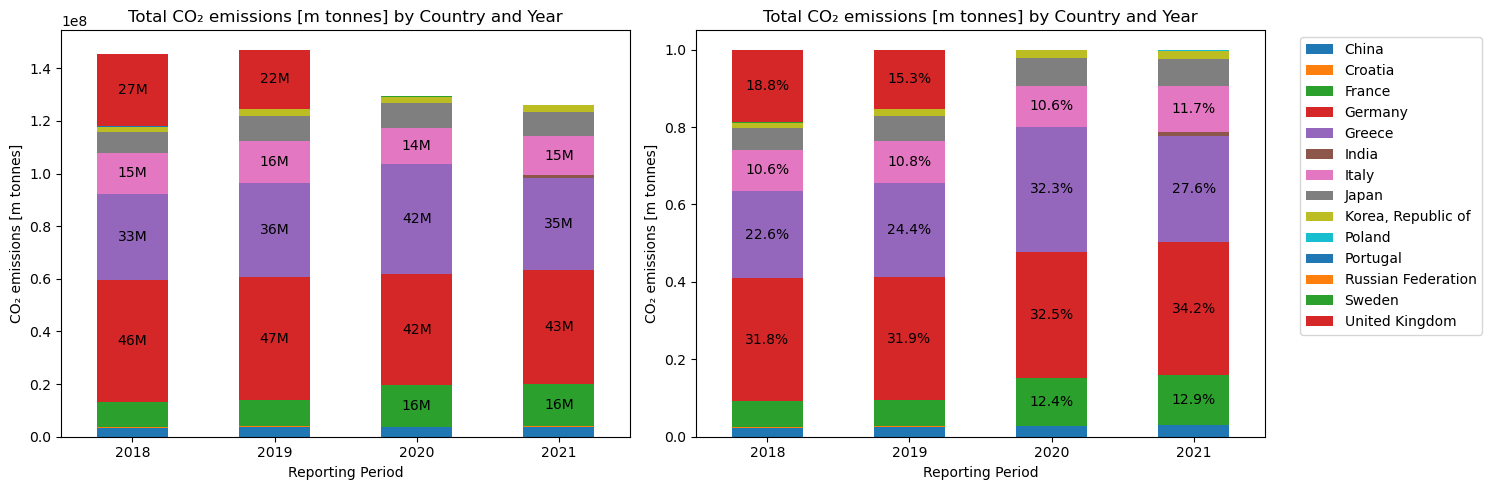

In [296]:
tot_c02_count = df.groupby(['Reporting Period', 'Verifier Country'])['Total CO₂ emissions [m tonnes]'].sum().reset_index().pivot('Reporting Period', 'Verifier Country', 'Total CO₂ emissions [m tonnes]')

fig, ax = plt.subplots(1,2, figsize = (15,5))

# stacked
tot_c02_count.plot(kind='bar', stacked=True, rot=0, ylabel='CO₂ emissions [m tonnes]', ax = ax.ravel()[0], legend=False)
ax.ravel()[0].set_title('Total CO₂ emissions [m tonnes] by Country and Year')
# ax.ravel()[0].set(yticks=([0, 50000000, 100000000, 150000000]))
# ax.ravel()[0].set(ylabels=(['0', '50M', '100M', '150M']))
# ax.ravel()[0].bar_label(ax.ravel()[0].containers[-1]/1000000)

for c in ax.ravel()[0].containers:
    labels = [str(round(v.get_height()/1000000)) + "M" if v.get_height() > 10000000 else '' for v in c]
    ax.ravel()[0].bar_label(c, labels=labels, label_type='center')

# stacked 100%
tot_c02_count.transpose().divide(tot_c02_count.sum(axis=1)).transpose().plot(kind='bar', stacked=True, rot=0, ylabel='CO₂ emissions [m tonnes]', ax = ax.ravel()[1])
ax.ravel()[1].set_title('Total CO₂ emissions [m tonnes] by Country and Year')
                  
for c in ax.ravel()[1].containers:
    labels = [str(round(v.get_height()*100.0,1)) + "%" if v.get_height() > 0.1 else '' for v in c]
    ax.ravel()[1].bar_label(c, labels=labels, label_type='center') 

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
fig.tight_layout()                                  

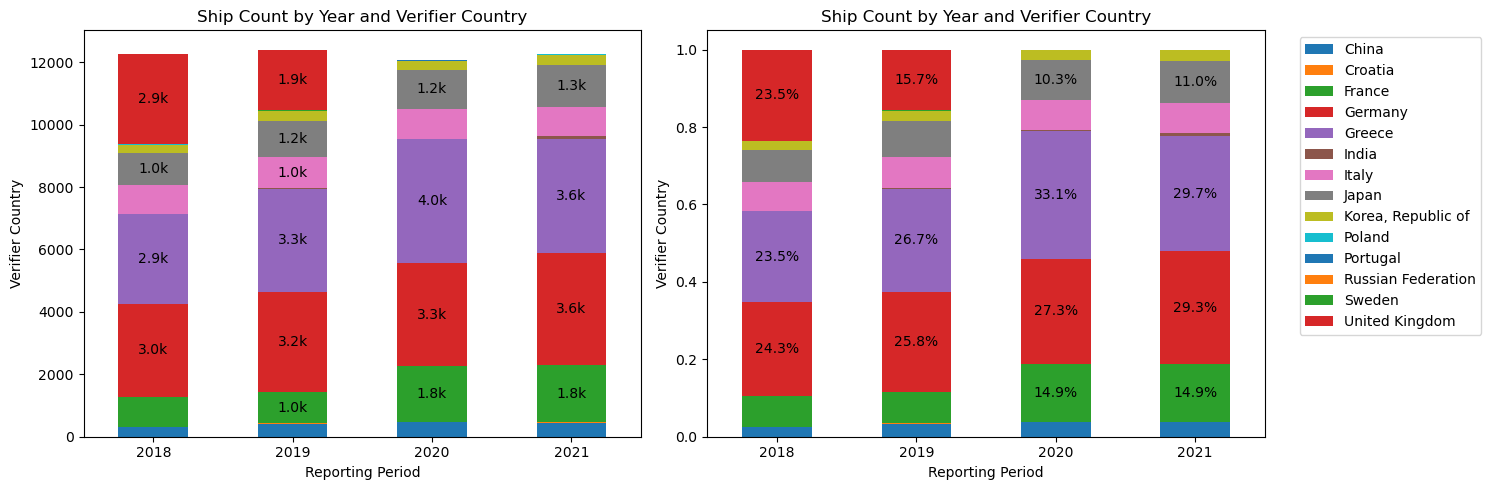

In [295]:
ship_count = df.groupby(['Reporting Period', 'Verifier Country'])['IMO Number'].count().reset_index().pivot('Reporting Period', 'Verifier Country', 'IMO Number')

fig, ax = plt.subplots(1,2, figsize = (15,5))

# stacked
ship_count.plot(kind='bar', stacked=True, rot=0, ylabel='Verifier Country', ax = ax.ravel()[0], legend=False)
ax.ravel()[0].set_title('Ship Count by Year and Verifier Country')
# ax.ravel()[0].bar_label(ax.ravel()[0].containers[-1])

for c in ax.ravel()[0].containers:
    labels = [str(round(v.get_height()/1000,1)) + "k" if v.get_height() > 1000 else '' for v in c]
    ax.ravel()[0].bar_label(c, labels=labels, label_type='center')

# stacked 100%
ship_count.transpose().divide(ship_count.sum(axis=1)).transpose().plot(kind='bar', stacked=True, rot=0, ylabel='Verifier Country', ax = ax.ravel()[1])
ax.ravel()[1].set_title('Ship Count by Year and Verifier Country')
                  
for c in ax.ravel()[1].containers:
    labels = [str(round(v.get_height()*100.0,1)) + "%" if v.get_height() > 0.1 else '' for v in c]
    ax.ravel()[1].bar_label(c, labels=labels, label_type='center') 

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
fig.tight_layout()                                  

### How many miles did each vessel in the database travel?
- Instead of miles travelled, we consider the average fuel consumption per nautical mile travelled.
- A steady decline in LNG carrier fuel consumption per n mile indicates newer cleaner fuels, energy-efficient technologies, or operational practices as mentioned above.
- On the other hand, in 2021, there was a spike in oil tanker fuel consumption per n mile, indicating some external factor is the cause.
- Furthermore, it would be interesting investigating the relationship of a ship types' average speed and their respective C02 emissions.
  - It's unlikely a linear relationship indicating a reduction in speed leads to a greater reduction in C02 emissions.
  - Comparing different ship types would be difficult due to design and other factor but could explain variation in operational efficiency.
- Answering our note from above (are container ship's emissions high because of fuel inefficiency or because they're travelling more?).
  - We see container ships' fuel efficiency improve by almost 40% so, container ships must be travelling further distances or their capacity has increased.
    - If the former, is there a possibility of optimizing their shipping routes?
    - If the latter, are there cleaner fuel options or more efficient engines?

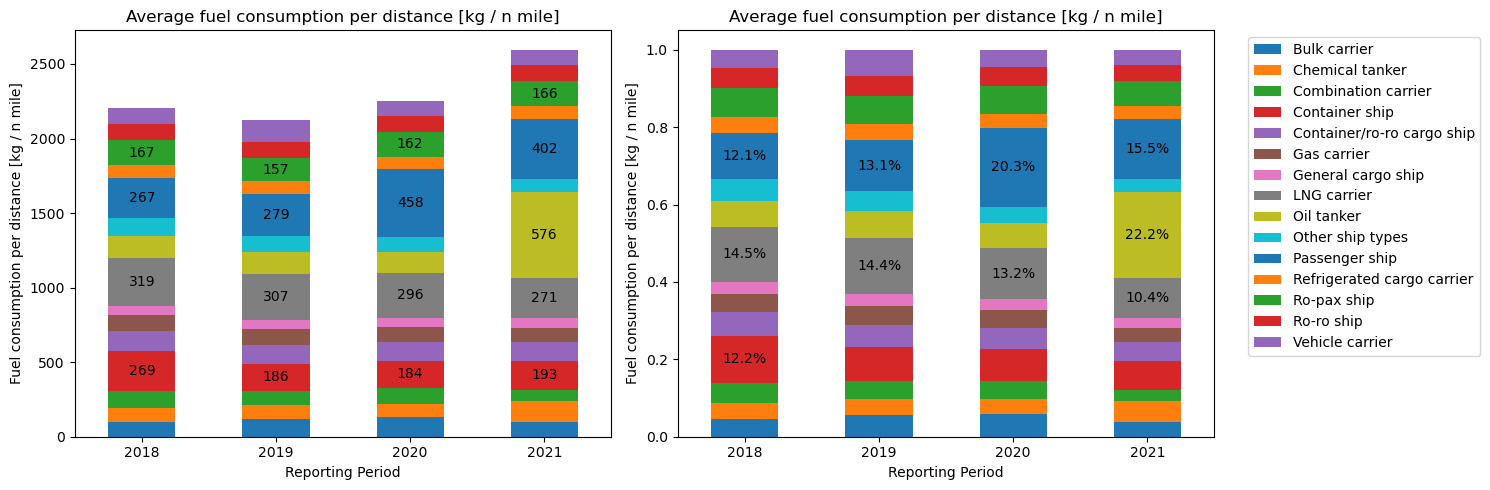

In [239]:
fuel_cons = df.drop(df[df['Annual average Fuel consumption per distance [kg / n mile]'] == 'Division by zero!'].index)
fuel_cons['Annual average Fuel consumption per distance [kg / n mile]'] = fuel_cons['Annual average Fuel consumption per distance [kg / n mile]'].astype(float)
fuel_cons = fuel_cons.groupby(['Reporting Period', 'Ship type'])['Annual average Fuel consumption per distance [kg / n mile]'].mean().reset_index().pivot('Reporting Period', 'Ship type', 'Annual average Fuel consumption per distance [kg / n mile]')

fig, ax = plt.subplots(1,2, figsize = (15,5))

# stacked
fuel_cons.plot(kind='bar', stacked=True, rot=0, ylabel='Fuel consumption per distance [kg / n mile]', ax = ax.ravel()[0], legend=False)
ax.ravel()[0].set_title('Average fuel consumption per distance [kg / n mile]')

for c in ax.ravel()[0].containers:
    labels = [round(v.get_height()) if v.get_height() > 150 else '' for v in c]
    ax.ravel()[0].bar_label(c, labels=labels, label_type='center')


# stacked 100%
fuel_cons.transpose().divide(fuel_cons.sum(axis=1)).transpose().plot(kind='bar', stacked=True, rot=0, ylabel='Fuel consumption per distance [kg / n mile]', ax = ax.ravel()[1])
ax.ravel()[1].set_title('Average fuel consumption per distance [kg / n mile]')
                  
for c in ax.ravel()[1].containers:
    labels = [str(round(v.get_height()*100.0,1)) + "%" if v.get_height() > 0.1 else '' for v in c]
    ax.ravel()[1].bar_label(c, labels=labels, label_type='center') 

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
fig.tight_layout()                                  

### What is the relationship between ship Deadweight and emissions intensity?

- Emission Intensity
  - We can look for trends or anomalies by comparing average emissions per n mile to average fuel consumption (displayed above).
  - Higher fuel consumption correlates to higher emissions.
    - I.e. there are no ships that have high fuel consumption but low emissions.
  - Perhaps there are opportunities to focus on fuel efficiency and reducing emissions for ships with the greatest emissions and fuel consumption.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


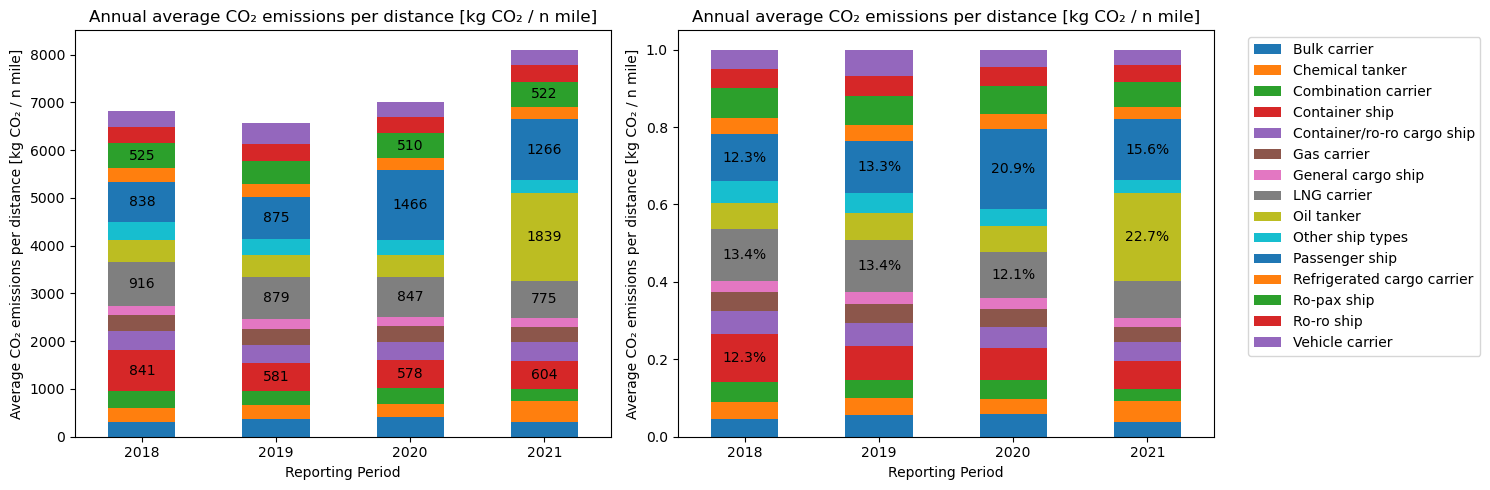

In [240]:
avg_co2 = df.drop(df[df['Annual average CO₂ emissions per distance [kg CO₂ / n mile]'] == 'Division by zero!'].index)
avg_co2['Annual average CO₂ emissions per distance [kg CO₂ / n mile]'] = avg_co2['Annual average CO₂ emissions per distance [kg CO₂ / n mile]'].astype(float)
avg_co2 = avg_co2.groupby(['Reporting Period', 'Ship type'])['Annual average CO₂ emissions per distance [kg CO₂ / n mile]'].mean().reset_index().pivot('Reporting Period', 'Ship type', 'Annual average CO₂ emissions per distance [kg CO₂ / n mile]')

fig, ax = plt.subplots(1,2, figsize = (15,5))

# stacked
avg_co2.plot(kind='bar', stacked=True, rot=0, ylabel='Average CO₂ emissions per distance [kg CO₂ / n mile]', ax = ax.ravel()[0], legend=False)
ax.ravel()[0].set_title('Annual average CO₂ emissions per distance [kg CO₂ / n mile]')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

for c in ax.ravel()[0].containers:
    labels = [round(v.get_height()) if v.get_height() > 500 else '' for v in c]
    ax.ravel()[0].bar_label(c, labels=labels, label_type='center')

# stacked 100%
avg_co2.transpose().divide(avg_co2.sum(axis=1)).transpose().plot(kind='bar', stacked=True, rot=0, ylabel='Average CO₂ emissions per distance [kg CO₂ / n mile]', ax = ax.ravel()[1])
ax.ravel()[1].set_title('Annual average CO₂ emissions per distance [kg CO₂ / n mile]')
                  
for c in ax.ravel()[1].containers:
    labels = [str(round(v.get_height()*100.0,1)) + "%" if v.get_height() > 0.1 else '' for v in c]
    ax.ravel()[1].bar_label(c, labels=labels, label_type='center') 

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
fig.tight_layout()                                  

### Compliance Assessment
  - Ships are consistently reporting their emissions accurately and on time indicating enforcement and/or incentives are working. 
  - Unsure why DoC dates are different.

In [241]:
df['date_diff'] = np.where(df['DoC issue date'] == df['DoC expiry date'], 0, 1)

In [242]:
df.groupby('Reporting Period')['date_diff'].mean().reset_index()

,Reporting Period,date_diff
0,2018,0.998531
1,2019,0.999758
2,2020,0.999917
3,2021,0.999918


The EIV value measures the ship's environmental performance relative to an efficient reference level by comparing the ship's actual emissions with a benchmark or target value.
  - As a whole, ships have become more technically efficient, especially LNG carriers.
  - However, it's worth noting, Bulk carriers' technical efficiecy significantly worsened (see bottom visualization).

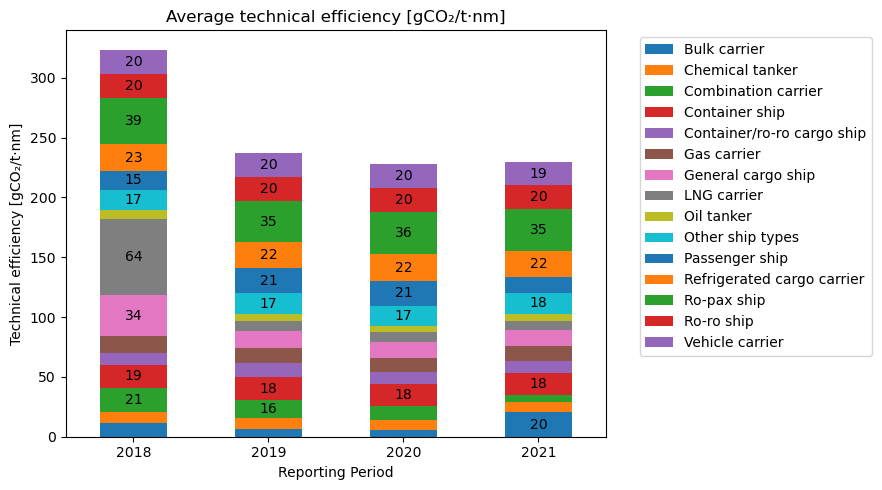

In [270]:
eiv = df.drop(df[df['Technical efficiency'] == 'Not Applicable'].index)
eiv = eiv.dropna(subset=['Technical efficiency'])
eiv['Technical efficiency'] = eiv['Technical efficiency'].str.split("(", expand=True)[1].str.split(" ", expand=True)[0].astype(float)

eiv = eiv.groupby(['Reporting Period', 'Ship type'])['Technical efficiency'].mean().reset_index().pivot('Reporting Period', 'Ship type', 'Technical efficiency')

fig, ax = plt.subplots(1,1, figsize = (9,5))

# stacked
eiv.plot(kind='bar', stacked=True, rot=0, ylabel='Technical efficiency [gCO₂/t·nm]', ax = ax, legend=False)
ax.set_title('Average technical efficiency [gCO₂/t·nm]')

for c in ax.containers:
    labels = [round(v.get_height()) if v.get_height() > 15 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
fig.tight_layout()                                  

In [271]:
per_change = df.drop(df[df['Technical efficiency'] == 'Not Applicable'].index)
per_change = per_change.dropna(subset=['Technical efficiency'])
per_change['Technical efficiency'] = per_change['Technical efficiency'].str.split("(", expand=True)[1].str.split(" ", expand=True)[0].astype(float)

per_change = per_change.groupby(['Reporting Period', 'Ship type'])['Technical efficiency'].mean().reset_index().sort_values(by=['Ship type', 'Reporting Period'])
per_change['prev_Te_%_change'] = per_change.sort_values('Reporting Period').groupby('Ship type')['Technical efficiency'].transform(lambda x: round((1-(x/x.shift(1)))*100,1))
per_change = per_change.pivot('Reporting Period', 'Ship type', 'prev_Te_%_change')
per_change

Ship type,Bulk carrier,Chemical tanker,Combination carrier,Container ship,Container/ro-ro cargo ship,Gas carrier,General cargo ship,LNG carrier,Oil tanker,Other ship types,Passenger ship,Refrigerated cargo carrier,Ro-pax ship,Ro-ro ship,Vehicle carrier
Reporting Period,,,,,,,,,,,,,,,
2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,41.4,3.1,24.2,2.9,-20.3,7.7,59.1,86.7,29.7,-3.3,-36.9,4.5,10.3,-1.9,1.6
2020,19.2,-1.3,26.9,0.8,17.6,8.0,2.1,5.7,1.9,4.4,0.9,-2.5,-2.4,0.4,1.6
2021,-274.4,3.1,42.8,2.0,0.1,-7.4,3.8,-0.8,-1.3,-8.6,37.8,0.5,2.4,-0.0,3.9


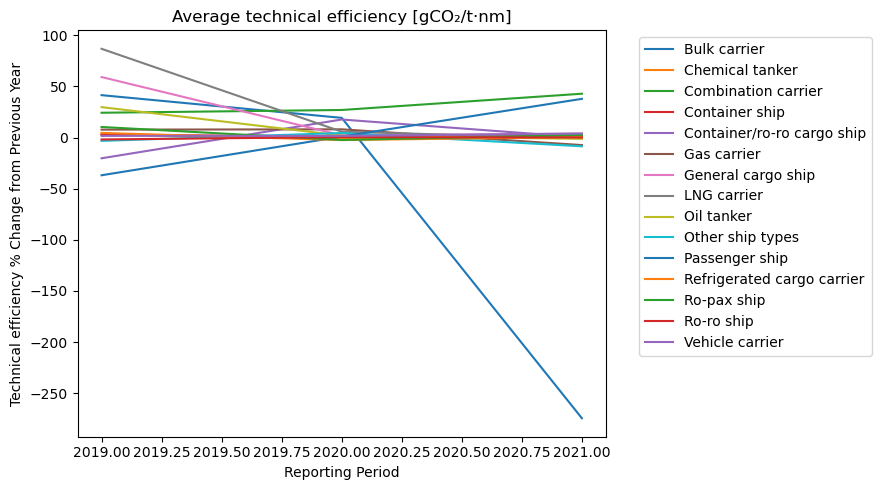

In [283]:
fig, ax = plt.subplots(1,1, figsize = (9,5))

# stacked
per_change.plot(kind='line', stacked=False, rot=0, ylabel='Technical efficiency % Change from Previous Year', ax = ax, legend=False)
ax.set_title('Average technical efficiency [gCO₂/t·nm]')

for c in ax.containers:
    labels = [round(v.get_height()) if v.get_height() > .15 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
fig.tight_layout()       